In [3]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pip install missingno
import missingno as msno
%pip install fancyimpute
from fancyimpute import IterativeImputer, KNN


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 37.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.1 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=342610fcc804aee383e8ed3261e00c6ed6779f051d3cc0454

In [ ]:
# Load the dataset
path = '/workspaces/DS_ML_Gr_1.5/2_BaselineModel/merged_data_new.csv'
merged_data = pd.read_csv(path)
df_merged_data = pd.DataFrame(merged_data)
df_merged_data = df_merged_data.replace(to_replace=r'^NaN$', value=False, regex=True)
df_merged_data = merged_data.replace(to_replace=r'^-$', regex=True)

df_merged_data

,Datum,Inflationsrate,Heimspiel,Weihnachtsmarkt,Markt,Faehrverkaehr,Kreuzfahrverkehr,Temperatur,Monat,Jahreszeit,...,Feiertage,Sonnenaufgang,Sonnenuntergang,Tageslaenge,Niederschlag,Sonnenschein (h),Schneehoehe,Sonnenschein,Tageslaenge (dezimal),KielerWoche
0,2013-07-01,1.53,0,0,0,1.576.718,419.447,17.8375,7.0,Sommer,...,0.0,4:50:12,21:56:46,17:06:34,0.3,6,False,0.350877,17.10,NaN
1,2013-07-01,1.53,0,0,0,1.576.718,419.447,17.8375,7.0,Sommer,...,0.0,4:50:12,21:56:46,17:06:34,0.3,6,False,0.350877,17.10,NaN
2,2013-07-01,1.53,0,0,0,1.576.718,419.447,17.8375,7.0,Sommer,...,0.0,4:50:12,21:56:46,17:06:34,0.3,6,False,0.350877,17.10,NaN
3,2013-07-01,1.53,0,0,0,1.576.718,419.447,17.8375,7.0,Sommer,...,0.0,4:50:12,21:56:46,17:06:34,0.3,6,False,0.350877,17.10,NaN
4,2013-07-01,1.53,0,0,0,1.576.718,419.447,17.8375,7.0,Sommer,...,0.0,4:50:12,21:56:46,17:06:34,0.3,6,False,0.350877,17.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9732,2019-07-27,NaN,1,0,0,NaN,NaN,23.5375,7.0,Sommer,...,0.0,5:23:29,21:28:35,16:05:06,0.0,False,False,0.000000,16.08,NaN
9733,2019-07-28,NaN,0,0,0,NaN,NaN,23.3500,7.0,Sommer,...,0.0,5:25:09,21:26:54,16:01:45,0.3,False,False,0.000000,16.02,NaN
9734,2019-07-29,NaN,0,0,0,NaN,NaN,25.2500,7.0,Sommer,...,0.0,5:26:49,21:25:10,15:58:21,2.1,False,False,0.000000,15.97,NaN
9735,2019-07-30,NaN,0,0,0,NaN,NaN,20.7375,7.0,Sommer,...,0.0,5:28:31,21:23:24,15:54:53,4.2,False,False,0.000000,15.90,NaN


### Visualization of Missing Data

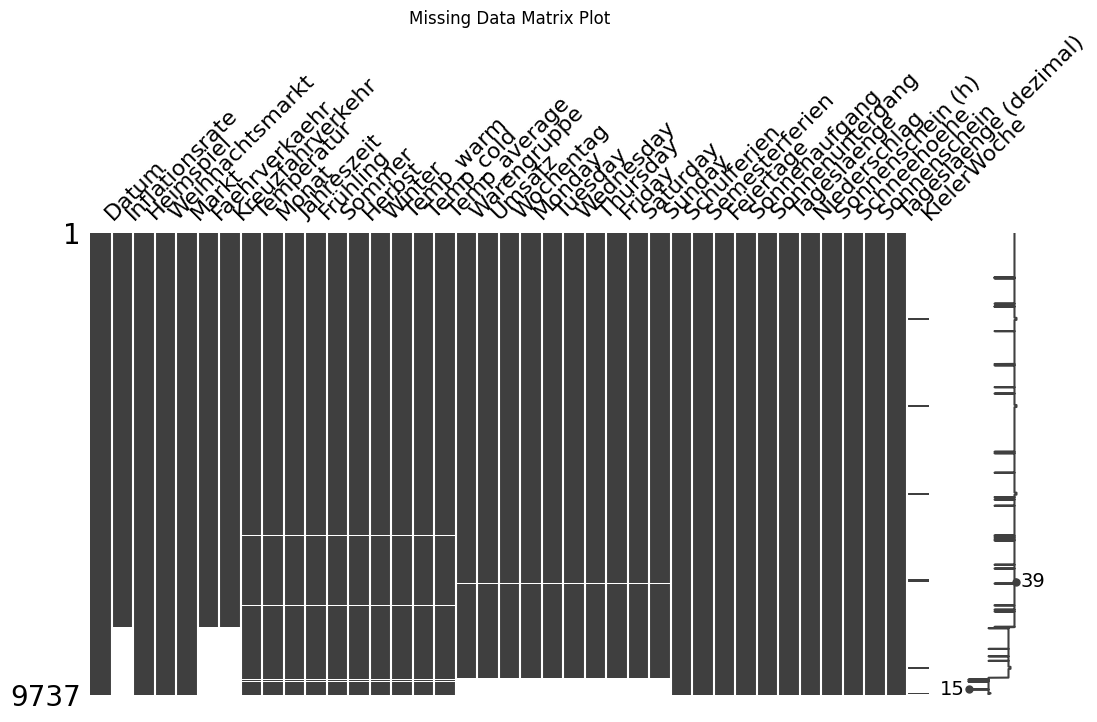

In [21]:
# Matrix plot of missing data
msno.matrix(df_merged_data, figsize=(12, 6))
plt.title('Missing Data Matrix Plot')
plt.show()

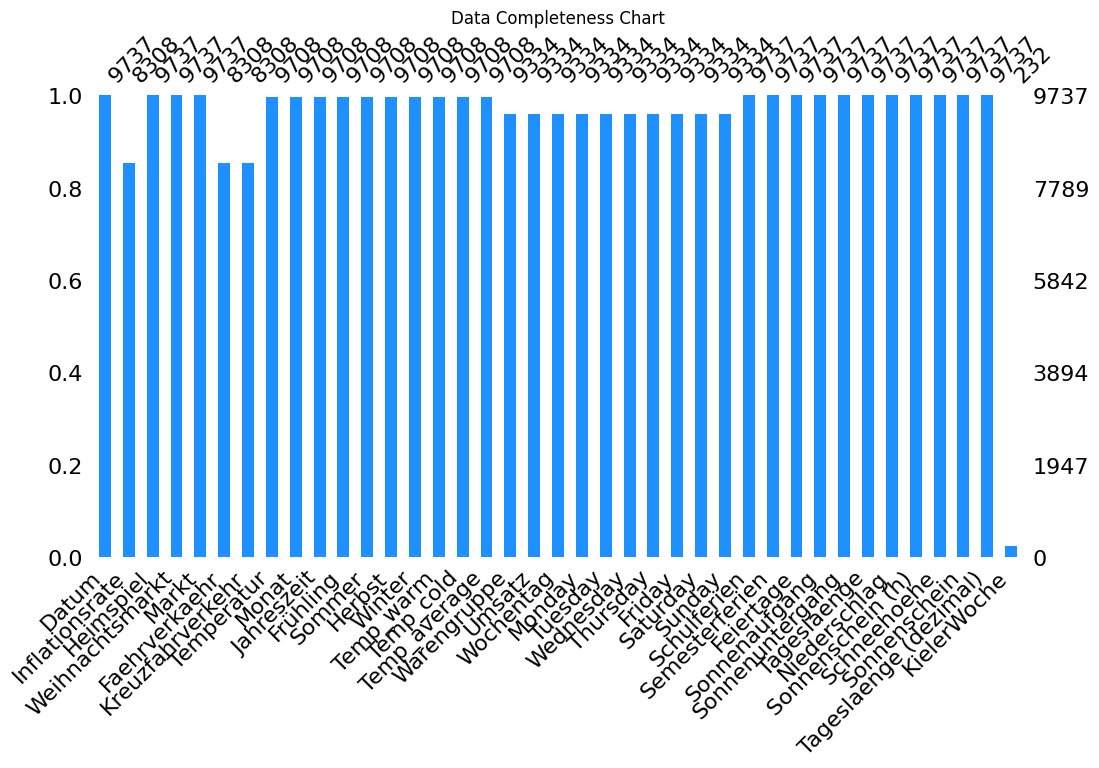

In [16]:
# Bar plot of complete data
msno.bar(df_merged_data, color="dodgerblue", figsize=(12, 6))
plt.title('Data Completeness Chart')
plt.show()

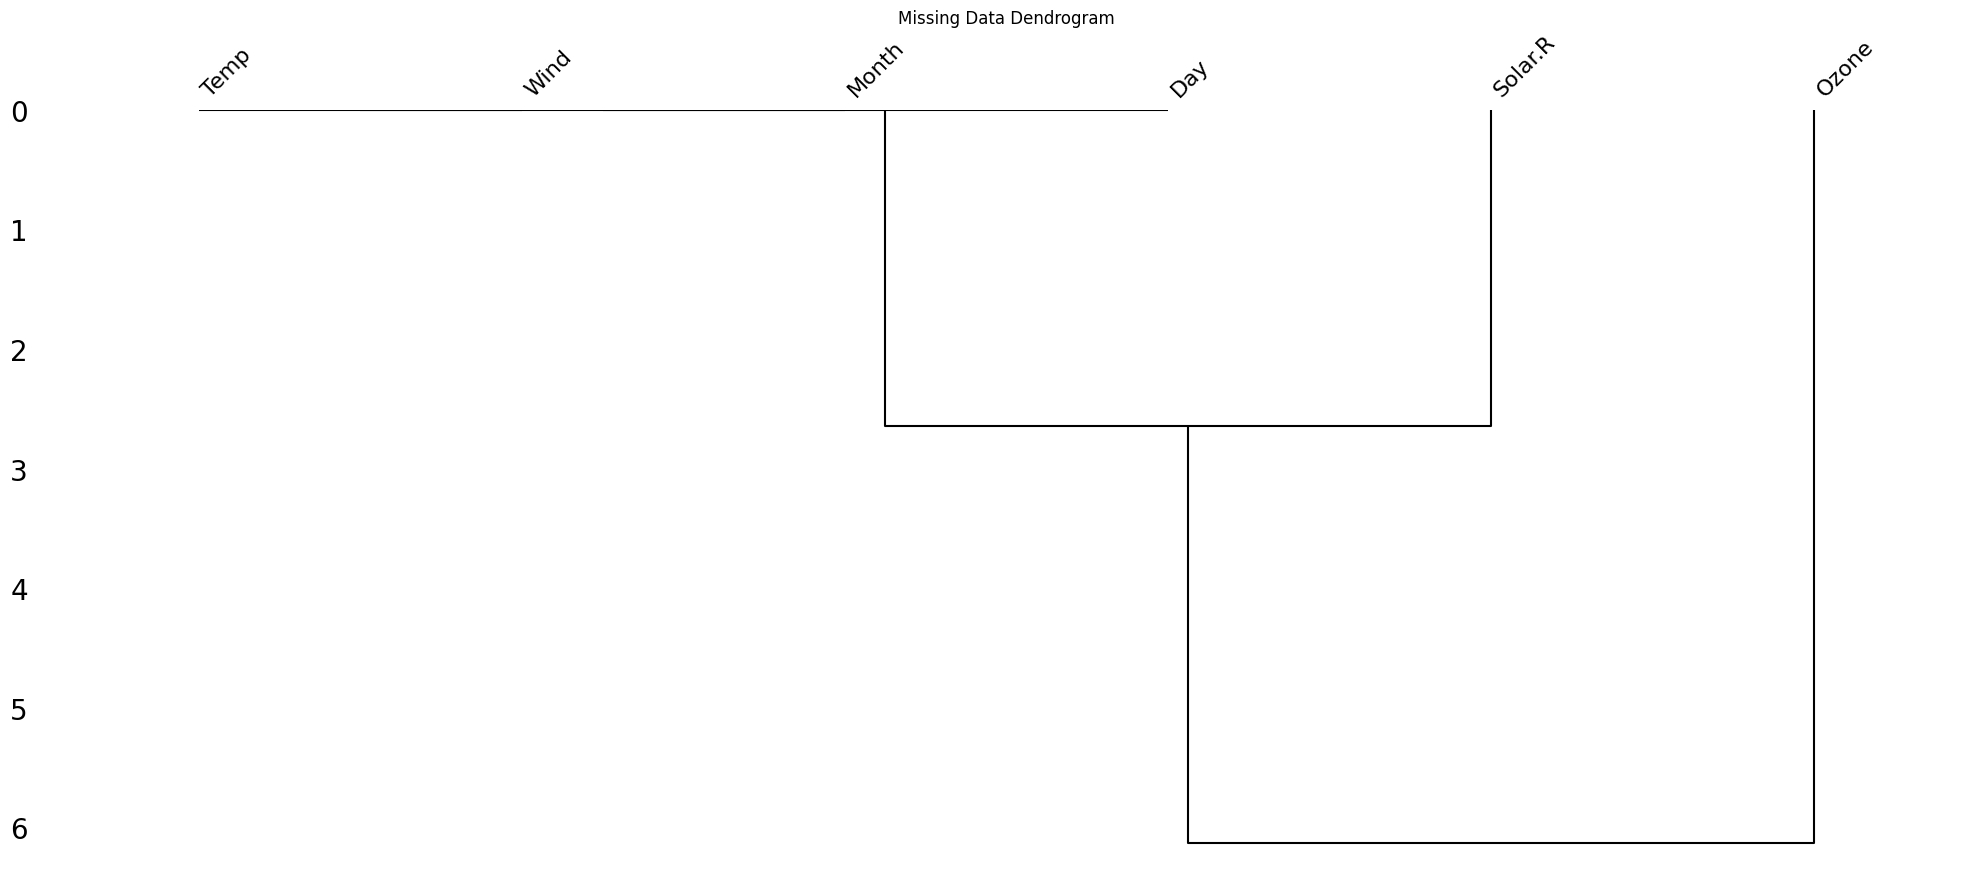

In [17]:

# Dendrogram to visualize the correlation of missingness between variables
msno.dendrogram(airquality)
plt.title('Missing Data Dendrogram')
plt.show()

### Imputation of Missing Data

In [18]:
# Create a mask for the imputed values
mask = airquality['Ozone'].isna()  # mask for missing values in 'Ozone'

In [19]:
# KNN imputation
imputer_knn = KNN()
airquality_knn = pd.DataFrame(imputer_knn.fit_transform(airquality), columns=airquality.columns)


Imputing row 1/153 with 0 missing, elapsed time: 0.014
Imputing row 101/153 with 0 missing, elapsed time: 0.017


In [20]:
# Iterative Robust Model Imputation (IRMI)
imputer_irmi = IterativeImputer()
airquality_irmi = pd.DataFrame(imputer_irmi.fit_transform(airquality), columns=airquality.columns)

### Visualization of Imputed Data

In [35]:
def plot_scatter_with_imputation(original_data, imputed_data, x, y, mask, title='Scatter Plot', xlabel='X-axis', ylabel='Y-axis'):
    plt.figure(figsize=(10, 6))
    
    # Overall min and max for both axes
    x_min = -20
    x_max = 100
    y_min = 50
    y_max = 100
    
    # Plot points
    sns.scatterplot(x=original_data.loc[~mask, x], y=original_data.loc[~mask, y], color='blue', label='Original')
    sns.scatterplot(x=imputed_data.loc[mask, x], y=imputed_data.loc[mask, y], color='red', label='Imputed')
    
    # Set consistent axis limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()


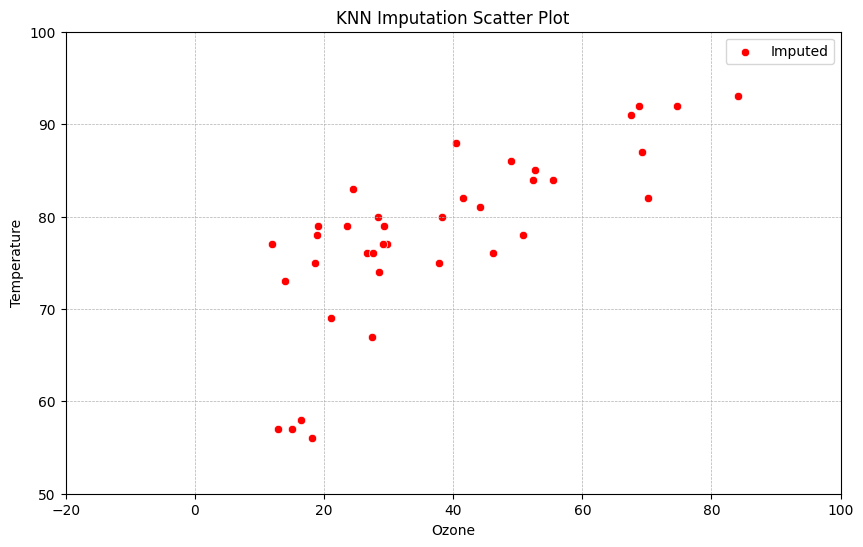

In [36]:
# Plotting results for KNN imputation
plot_scatter_with_imputation(airquality, airquality_knn, 'Ozone', 'Temp', mask, 'KNN Imputation Scatter Plot', 'Ozone', 'Temperature')

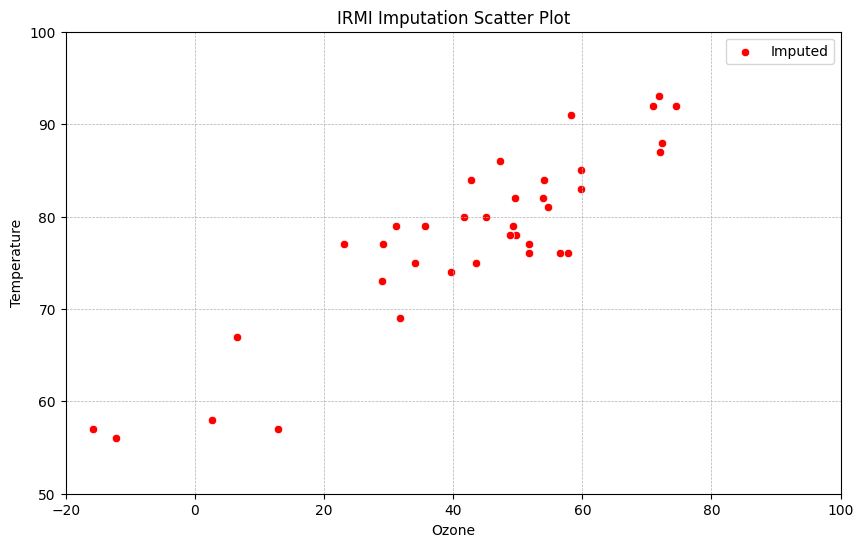

In [37]:
# Plotting results for IRMI imputation
plot_scatter_with_imputation(airquality, airquality_irmi, 'Ozone', 'Temp', mask, 'IRMI Imputation Scatter Plot', 'Ozone', 'Temperature')

### Correlation Analysis

In [24]:
print("Correlation in original data:", airquality['Ozone'].corr(airquality['Temp'], method='pearson'))
print("Correlation after KNN imputation:", airquality_knn['Ozone'].corr(airquality_knn['Temp']))
print("Correlation after IRMI:", airquality_irmi['Ozone'].corr(airquality_irmi['Temp']))

Correlation in original data: 0.6983603421509318
Correlation after KNN imputation: 0.6938473095886781
Correlation after IRMI: 0.7251146461034882
